# Simple Moving Average

### Moving Average

A moving average is a statistical technique to analyze data points by creating a series of averages of different subsets of the full data set. It is commonly used in time series analysis to smooth out short-term fluctuations and highlight longer-term trends or cycles. The moving average is particularly popular in financial markets for analyzing stock prices, economic indicators, etc.

#### Types of Moving Averages

1. **Simple Moving Average (SMA)**: Calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range.
2. **Exponential Moving Average (EMA)**: Gives more weight to the most recent prices and less to older prices, making it more responsive to new information.

#### Example of SMA

For example, consider a stock with closing prices over five days as follows: \$10, \$11, \$12, \$13, and \$14.

- A 3-day SMA would be calculated as follows:
    - Day 3 SMA: \((10 + 11 + 12) / 3 = \$11\)
    - Day 4 SMA: \((11 + 12 + 13) / 3 = \$12\)
    - Day 5 SMA: \((12 + 13 + 14) / 3 = \$13\)

### The `rolling` Function in Pandas

Pandas provides the `.rolling()` method for DataFrame and Series, which is used to apply a moving average or other rolling window functions. This function is essential for calculating moving averages, sums, or other statistics over a specified window size on time series data.

#### Syntax

```python
DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None)
```

- `window`: Size of the moving window. This is the number of observations used for calculating the statistic.
- `min_periods`: Minimum number of observations in the window required to have a value (otherwise result is NA).
- `center`: Set to True to set the labels at the center of the window.
- `win_type`: Provide a window type for weighted moving averages.


# 0. Libraries and Settings

In [1]:
import yfinance as yf
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

# 1. Simple Moving Average

In [2]:
# get all the data for spy
spy = yf.download('SPY')
spy

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,24.840689,1003200
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.017355,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.070358,201300
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.335365,529400
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.441378,531500
...,...,...,...,...,...,...
2024-02-05,493.700012,494.380005,490.230011,492.549988,492.549988,75757100
2024-02-06,493.519989,494.320007,492.049988,493.980011,493.980011,55918600
2024-02-07,496.290009,498.529999,495.359985,498.100006,498.100006,70556500


                 Close
Date                  
1993-01-29   43.937500
1993-02-01   44.250000
1993-02-02   44.343750
1993-02-03   44.812500
1993-02-04   45.000000
...                ...
2024-02-05  492.549988
2024-02-06  493.980011
2024-02-07  498.100006
2024-02-08  498.320007
2024-02-09  501.200012

[7814 rows x 1 columns]


<Axes: xlabel='Date'>

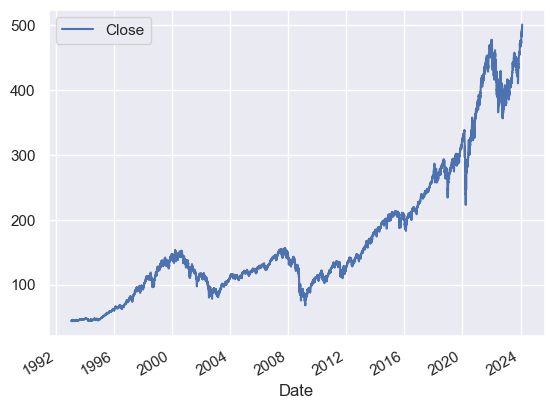

In [7]:
spy_close = spy['Close'].to_frame()
print(spy_close)
spy_close.plot()
# now we want to calculate the moving average of this data

In [ ]:
# we will use the rolling function to calculate the moving average
# the rolling function takes a window parameter which is the number of data points to use in the average

In [12]:
spy_roll = spy_close.rolling(window = 10).mean()
spy_roll.head(20)
# the first 10 are NaN because we don't have enough data to calculate the average
# then the average is calculated for the next 10 data points and so on

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,NaN
1993-02-05,NaN
1993-02-08,NaN
1993-02-09,NaN
1993-02-10,NaN


In [15]:
# we can ues the median to get the middle value of the window
spy_close.rolling(window=10).median().head(20)

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,NaN
1993-02-05,NaN
1993-02-08,NaN
1993-02-09,NaN
1993-02-10,NaN


In [18]:
# can calculate the maximum and minimum value of the window

print(spy_close.rolling(window=10).max().head(20)) # this will carry on until the next maximum is found
print("\n")
print(spy_close.rolling(window=20).min().head(20)) # this will carry on until the next minimum is found

               Close
Date                
1993-01-29       NaN
1993-02-01       NaN
1993-02-02       NaN
1993-02-03       NaN
1993-02-04       NaN
1993-02-05       NaN
1993-02-08       NaN
1993-02-09       NaN
1993-02-10       NaN
1993-02-11  45.00000
1993-02-12  45.00000
1993-02-16  45.00000
1993-02-17  45.00000
1993-02-18  45.00000
1993-02-19  44.96875
1993-02-22  44.96875
1993-02-23  44.93750
1993-02-24  44.93750
1993-02-25  44.93750
1993-02-26  44.59375


               Close
Date                
1993-01-29       NaN
1993-02-01       NaN
1993-02-02       NaN
1993-02-03       NaN
1993-02-04       NaN
1993-02-05       NaN
1993-02-08       NaN
1993-02-09       NaN
1993-02-10       NaN
1993-02-11       NaN
1993-02-12       NaN
1993-02-16       NaN
1993-02-17       NaN
1993-02-18       NaN
1993-02-19       NaN
1993-02-22       NaN
1993-02-23       NaN
1993-02-24       NaN
1993-02-25       NaN
1993-02-26  43.40625


In [21]:
# we can specify a minimum period for the window to calculate the average even tho the window is not full
# this is done using the min_periods parameter. 
# This parameter is useful for dealing with missing data and for specifying how strict you want the calculation to be regarding the number of observations.

#This means that for the first and last few days of the data set, where a full 10-day window isn't available, the function will still calculate the average if there are at least 5 days of data available. If there are less than 5 days of data in the window, the result will be NaN.

spy_close.rolling(window=10, min_periods=5).mean().head(20)

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,44.468750
1993-02-05,44.552083
1993-02-08,44.611607
1993-02-09,44.617188
1993-02-10,44.628472


In [29]:
spy_close["SMA_50"] = spy_close.rolling(window=50, min_periods=50).mean()
spy_close

,Close,SMA_50
Date,,
1993-01-29,43.937500,NaN
1993-02-01,44.250000,NaN
1993-02-02,44.343750,NaN
1993-02-03,44.812500,NaN
1993-02-04,45.000000,NaN
...,...,...
2024-02-05,492.549988,472.219201
2024-02-06,493.980011,472.998401
2024-02-07,498.100006,473.854402


## 1.1 Here's another example

In [26]:

data = {'Date': pd.date_range(start='2021-01-01', periods=10, freq='D'),
        'Close': [100, 101, None, 103, 104, 105, None, 107, 108, 109]}
df = pd.DataFrame(data).set_index('Date')
df

,Close
Date,
2021-01-01,100.0
2021-01-02,101.0
2021-01-03,NaN
2021-01-04,103.0
2021-01-05,104.0
2021-01-06,105.0
2021-01-07,NaN
2021-01-08,107.0
2021-01-09,108.0


In [24]:

# Calculate a 3-day SMA, allowing calculation with at least 2 non-NA values
df['3-day SMA'] = df['Close'].rolling(window=3, min_periods=2).mean()
df

# In this example, even if there's a None value within a 3-day window, the SMA will still be calculated as long as there are at least 2 non-NA values within that window. 
# This flexibility helps in handling missing data effectively while smoothing or analyzing time series data.

# The window and min_periods arguments together provide control over how the rolling window behaves, 
# especially in the presence of missing data or when analyzing the beginning and end of a data set where the window size might not be fully satisfied.

,Close,3-day SMA
Date,,
2021-01-01,100.0,NaN
2021-01-02,101.0,100.5
2021-01-03,NaN,100.5
2021-01-04,103.0,102.0
2021-01-05,104.0,103.5
2021-01-06,105.0,104.0
2021-01-07,NaN,104.5
2021-01-08,107.0,106.0
2021-01-09,108.0,107.5


## 1.2 Plotting the SMA and the Stock price:

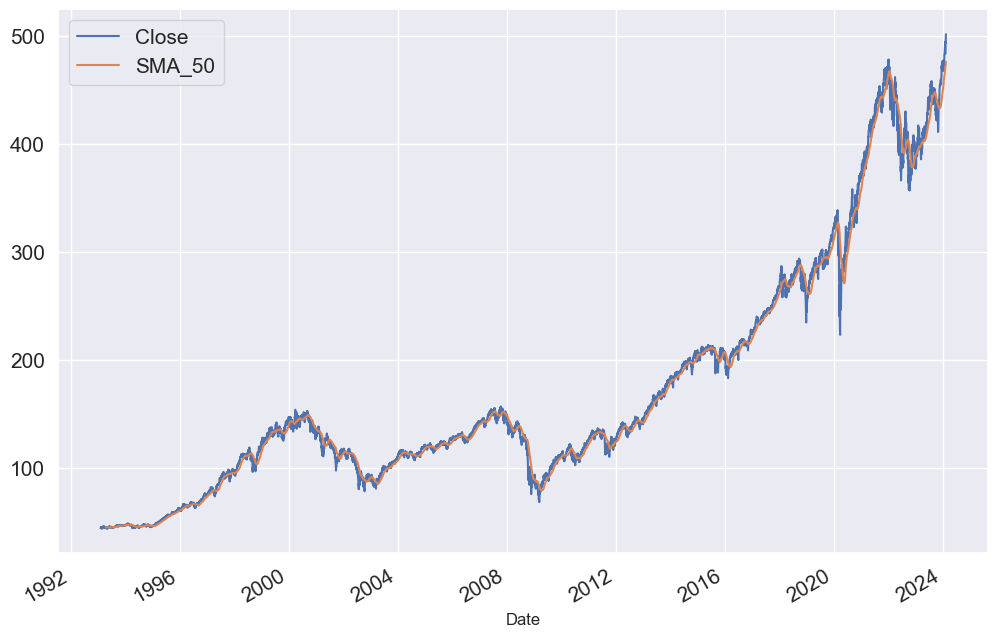

In [30]:
spy_close.plot(figsize = (12, 8), fontsize = 15)
plt.legend(loc = "upper left", fontsize = 15)
plt.show()

In [34]:
# 200 day moving average
spy_close["SMA_200"] = spy_close['Close'].rolling(window=200, min_periods=200).mean()


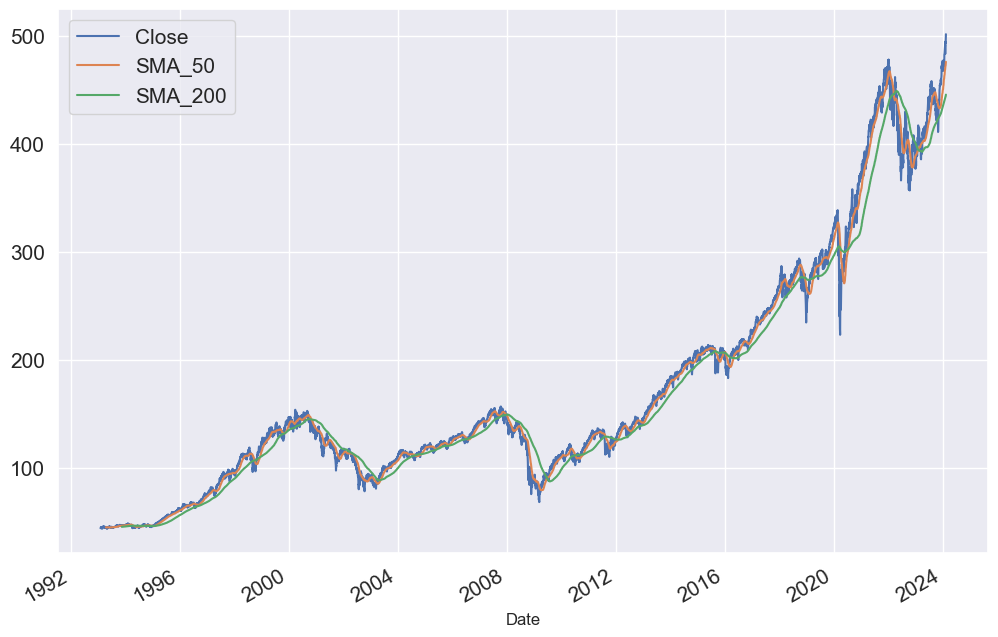

In [35]:
spy_close.plot(figsize = (12, 8), fontsize = 15)
plt.legend(loc = "upper left", fontsize = 15)
plt.show()